<a href="https://colab.research.google.com/github/Sakethra/Doctor_visit_analysis/blob/main/Doctor_Visit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from Excel file
df = pd.read_excel(r"/content/DoctorVisits (2).xlsx")

***Data Cleaning***

In [3]:
#Adjusting appropriate values of age and income
df["age"] = df["age"] * 100
df["income"] = df["income"] * 10000
df = df[df['income'] != 0]
df = df[df['visits'] != 0]
df = df[df['illness'] != 0]

**Analysing the data**

In [4]:
# Display first 15 rows
print(df.head(15))

    s.no  visits  gender   age  income  illness  reduced  health private  \
0      1       1  female  19.0  5500.0        1        4       1     yes   
1      2       1  female  19.0  4500.0        1        2       1     yes   
2      3       1    male  19.0  9000.0        3        0       0      no   
3      4       1    male  19.0  1500.0        1        0       0      no   
4      5       1    male  19.0  4500.0        2        5       1      no   
5      6       1  female  19.0  3500.0        5        1       9      no   
6      7       1  female  19.0  5500.0        4        0       2      no   
7      8       1  female  19.0  1500.0        3        0       6      no   
8      9       1  female  19.0  6500.0        2        0       5     yes   
9     10       1    male  19.0  1500.0        1        0       0     yes   
10    11       1    male  19.0  4500.0        1        0       0      no   
11    12       1    male  19.0  2500.0        2        0       2      no   
12    13    

In [5]:
#Displaying information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 0 to 1017
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   s.no       933 non-null    int64  
 1   visits     933 non-null    int64  
 2   gender     933 non-null    object 
 3   age        933 non-null    float64
 4   income     933 non-null    float64
 5   illness    933 non-null    int64  
 6   reduced    933 non-null    int64  
 7   health     933 non-null    int64  
 8   private    933 non-null    object 
 9   freepoor   933 non-null    object 
 10  freerepat  933 non-null    object 
 11  nchronic   933 non-null    object 
 12  lchronic   933 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 102.0+ KB
None


In [6]:
# Value counts for 'illness'
print(df["illness"].value_counts())

1    315
2    255
3    164
4    100
5     99
Name: illness, dtype: int64


In [7]:
# Value counts for 'gender'
print(df["gender"].value_counts())

female    587
male      346
Name: gender, dtype: int64


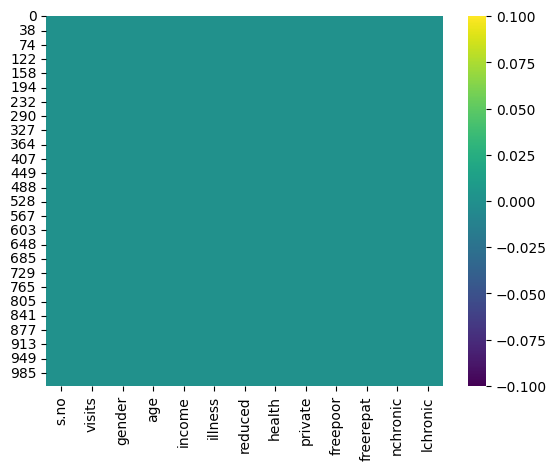

In [8]:
# Visualize missing values
sns.heatmap(df.isnull(), annot=False, cmap='viridis')
plt.show()

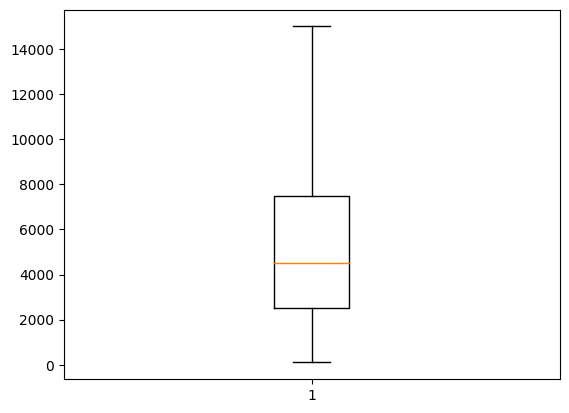

In [9]:
# Visualizing the maximum, minimum, and medium income
y = list(df.income)
plt.boxplot(y)
plt.show()

<ipython-input-10-a01a742e016f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10}, linewidths=0.5)


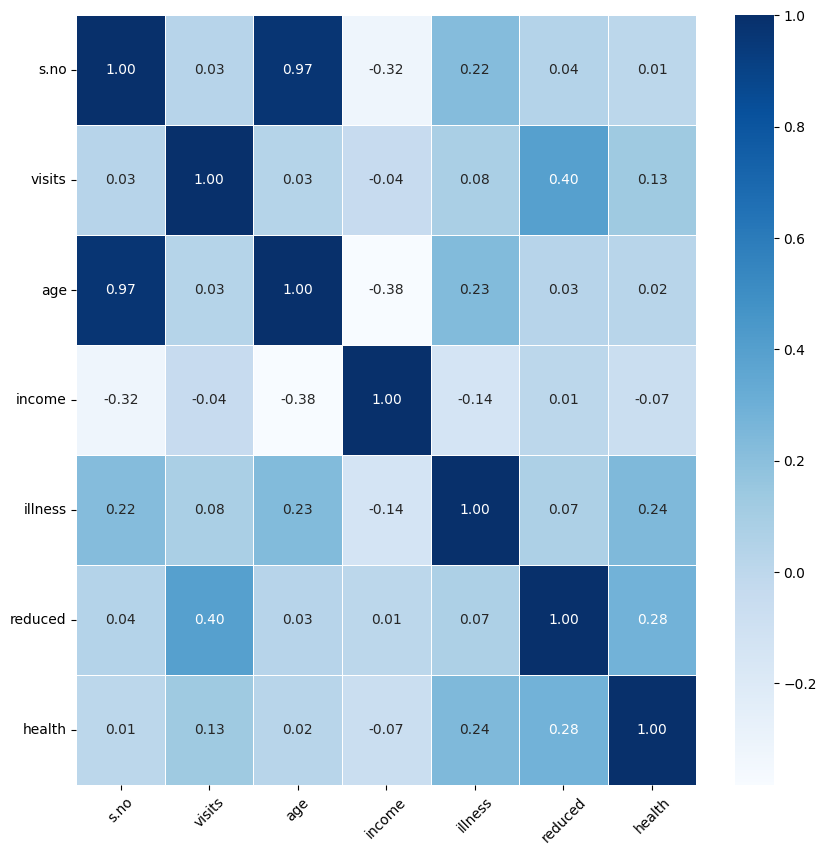

In [10]:
# Finding correlation between variables
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues', fmt=".2f", annot_kws={"size": 10}, linewidths=0.5)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()

***Analysis***

<Figure size 1000x600 with 0 Axes>

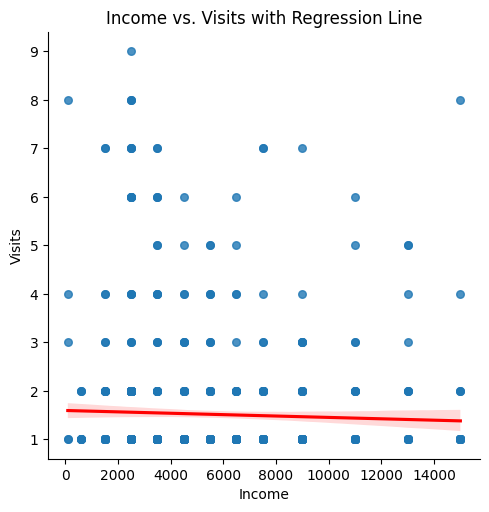

In [11]:
# Analyzing how the income of a patient affects the number of visits to the hospital
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lmplot(x='income', y='visits', data=df, scatter_kws={'s': 30}, line_kws={'color': 'red'})
plt.xlabel('Income')
plt.ylabel('Visits')
plt.title('Income vs. Visits with Regression Line')
plt.show()
#The red line represents the regression line that best fits the data. The slope of the regression line indicates the direction of the relationship between income and visits.

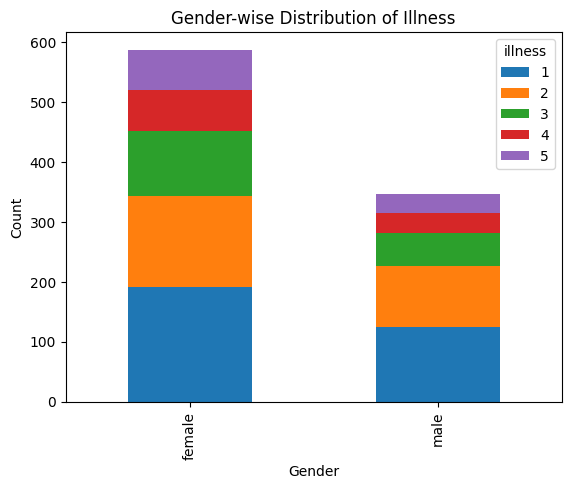

In [12]:
# Gender-wise distribution of affected by illness
cross_tab = pd.crosstab(df['gender'], df['illness'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender-wise Distribution of Illness')
plt.show()

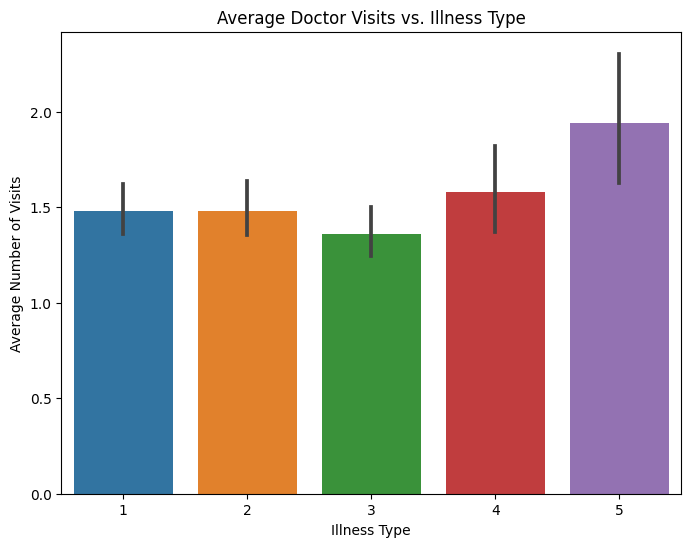

In [13]:
#Visualizing Average Doctor Visits vs. Illness Type
plt.figure(figsize=(8, 6))
sns.barplot(x='illness', y='visits', data=df)
plt.title('Average Doctor Visits vs. Illness Type')
plt.xlabel('Illness Type')
plt.ylabel('Average Number of Visits')
plt.show()

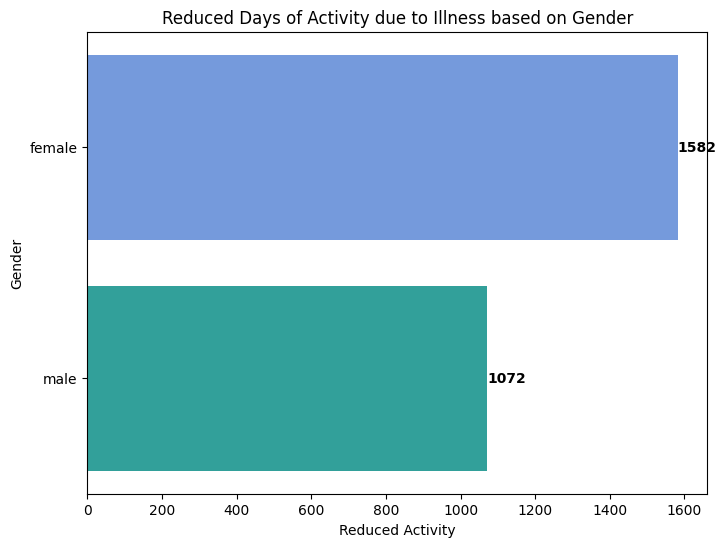

In [14]:
#Analysing Reduced Days of Activity due to Illness based on Gender
# Group the data and calculate the sum of 'reduced' days for each gender
db = df.groupby('gender')['reduced'].sum().to_frame().reset_index()

# Set the color palette for the chart
colors = ['cornflowerblue', 'lightseagreen']

# Create a grouped bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='reduced', y='gender', data=db, palette=colors)

# Adding labels to the bars
for index, value in enumerate(db['reduced']):
    plt.text(value, index, str(value), ha='left', va='center', color='black', fontweight='bold')

# Adding aesthetics
plt.title('Reduced Days of Activity due to Illness based on Gender')
plt.xlabel('Reduced Activity')
plt.ylabel('Gender')

# Plot presentation
plt.show()